# Salary (YearsOfExperience - Salary) Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_dataset.csv", index_col=0)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Exploratory Data Analysis

In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [5]:
df.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


## Dividing the dataset into feature and target variables

In [6]:
x = df.YearsExperience.values
y = df.Salary.values

In [7]:
x

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [8]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

## Visual Exploratory Data Analysis

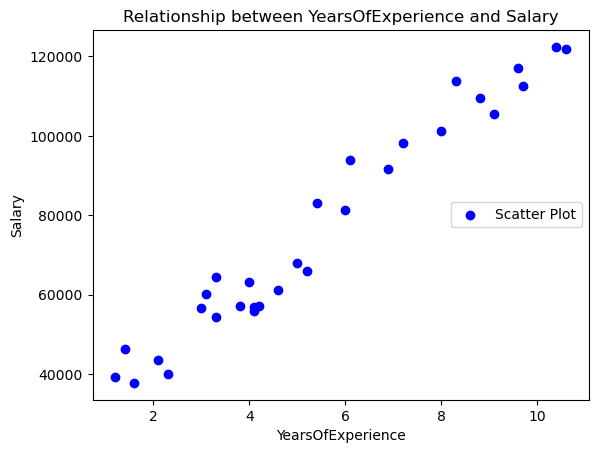

In [9]:
plt.scatter(x, y, color='blue', label='Scatter Plot')
plt.title('Relationship between YearsOfExperience and Salary')
plt.xlabel('YearsOfExperience')
plt.ylabel('Salary')
plt.legend(loc=5)
plt.show()

## Checking dimensions of X and Y

In [10]:
print(x.shape)
print(y.shape)

(30,)
(30,)


## Reshaping X and Y to train the model

In [11]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(30, 1)
(30, 1)


## Split X and Y into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=62)

# Printing the dimensions of X_train,X_test,y_train,y_test
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((24, 1), (6, 1), (24, 1), (6, 1))

## Model Implementation

In [13]:
# Initialization
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Training the model
lm.fit(X_train, Y_train)

# Predicting on test data
Y_pred = lm.predict(X_test)

## Model slope and intercept term

In [14]:
# Slope And Intercept

print("Estmated model slope:", lm.coef_)
print("Estmated model intercept:", lm.intercept_)

Estmated model slope: [[9184.00083364]]
Estmated model intercept: [25866.55402965]


In [15]:
# Single Prediction

lm.predict([[4.8]])

array([[69949.75803114]])

## Evaluation (Metrics)

#### Root Mean Square Error

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 5155.5107


#### R2 Score

In [17]:
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(Y_test, Y_pred)))

R2 score value: 0.9720


## Ploting the Regression Line

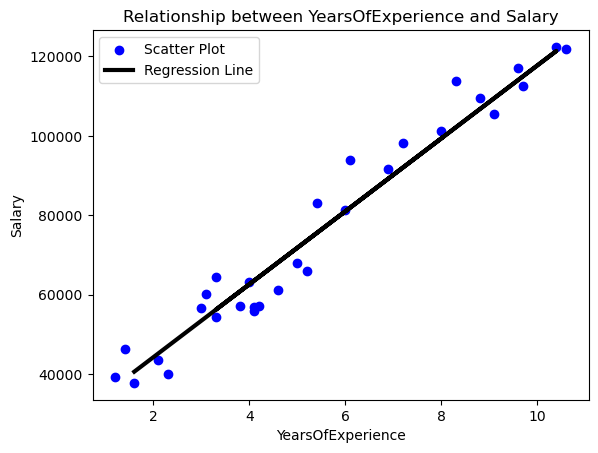

In [18]:
plt.scatter(x, y, color='blue', label='Scatter Plot')
plt.plot(X_test, Y_pred, color='black', linewidth=3, label= 'Regression Line')
plt.title('Relationship between YearsOfExperience and Salary')
plt.xlabel('YearsOfExperience')
plt.ylabel('Salary')
plt.legend() 
plt.show()